PROJECT: Covid 19 ICU predictions. This project aims at using neural networks to predict COVID 19 ICU states. 
There are several variables to consider and Machine Learning can be used ,although given the 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import nn

In [2]:
df = pd.read_excel("C:\\Datasets\\covid\\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [3]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [4]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [5]:
df.shape

(1925, 231)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

In [8]:
df.shape

(545, 231)

In [9]:
def check_relations(column1,column2,column3,df=df):
    fig= plt.figure(figsize=(20,8))
    plt.subplot(2,2,1)
    sns.jointplot(x=column1,y=column2,data=df)
    plt.title(f"{column1}vs{column2}")
    plt.subplot(2,2,2)
    sns.jointplot(x=column1,y=column3,data=df)
    plt.title(f"{column1}vs{column3}")
    plt.subplot(2,2,3)
    sns.jointplot(x=column2,y=column3,data=df)
    plt.title(f"{column1}vs{column2}")
    plt.show()

In [10]:
df.columns[:30]

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN',
       'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN',
       'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX',
       'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN',
       'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF',
       'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN'],
      dtype='object')

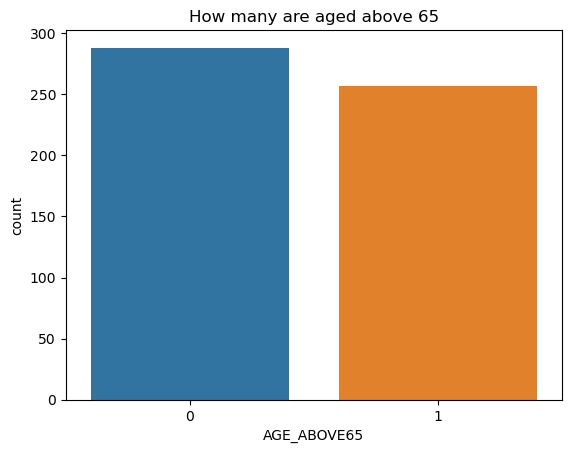

In [11]:
sns.countplot(x='AGE_ABOVE65',data=df)
plt.title('How many are aged above 65')
plt.show()

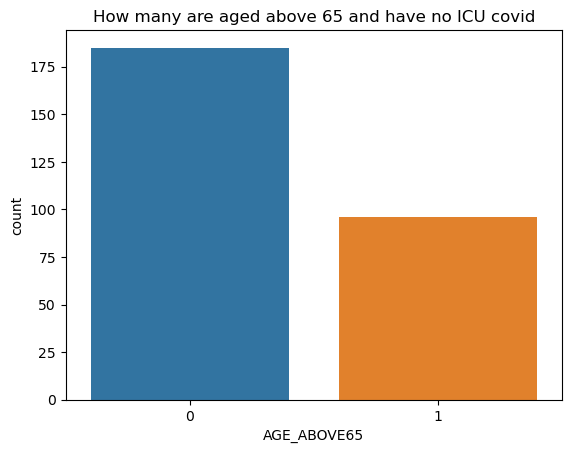

In [12]:
sns.countplot(x=df[df['ICU']==0]['AGE_ABOVE65'])
plt.title('How many are aged above 65 and have no ICU covid')
plt.show()

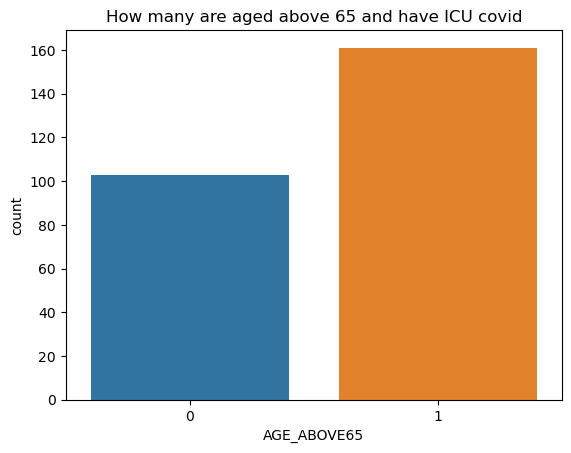

In [13]:
sns.countplot(x=df[df['ICU']==1]['AGE_ABOVE65'])
plt.title('How many are aged above 65 and have ICU covid')
plt.show()

In [14]:
df['AGE_PERCENTIL'].value_counts().head()

10th    61
40th    60
20th    58
70th    55
30th    55
Name: AGE_PERCENTIL, dtype: int64

In [15]:
df.drop(['PATIENT_VISIT_IDENTIFIER','AGE_PERCENTIL','WINDOW'],axis=1,inplace=True)

In [16]:
df.dtypes

AGE_ABOVE65                     int64
GENDER                          int64
DISEASE GROUPING 1            float64
DISEASE GROUPING 2            float64
DISEASE GROUPING 3            float64
                               ...   
HEART_RATE_DIFF_REL           float64
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
ICU                             int64
Length: 228, dtype: object

In [17]:
np.where(type(df.columns[:2])==(object))

(array([], dtype=int64),)

In [18]:
df.columns[:100]

Index(['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER',
       'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX',
       'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN',
       'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF',
       'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX',
       'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN',
       'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF',
       'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN',
       'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN',
       'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX',
       'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN',
       'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN',
       'CALCIUM_MIN', 'CALCIUM_MAX', 'C

In [19]:
df['DISEASE GROUPING 5'].value_counts().head()

0.0    466
1.0     79
Name: DISEASE GROUPING 5, dtype: int64

In [20]:
df.columns[101:120]

Index(['NEUTROPHILES_MEDIAN', 'NEUTROPHILES_MEAN', 'NEUTROPHILES_MIN',
       'NEUTROPHILES_MAX', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_MEDIAN',
       'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX',
       'P02_ARTERIAL_DIFF', 'P02_VENOUS_MEDIAN', 'P02_VENOUS_MEAN',
       'P02_VENOUS_MIN', 'P02_VENOUS_MAX', 'P02_VENOUS_DIFF',
       'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN',
       'PC02_ARTERIAL_MAX'],
      dtype='object')

In [21]:
df.columns[121:128]

Index(['PC02_VENOUS_MEDIAN', 'PC02_VENOUS_MEAN', 'PC02_VENOUS_MIN',
       'PC02_VENOUS_MAX', 'PC02_VENOUS_DIFF', 'PCR_MEDIAN', 'PCR_MEAN'],
      dtype='object')

In [22]:
df.corr().columns

Index(['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
       ...
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU'],
      dtype='object', length=228)

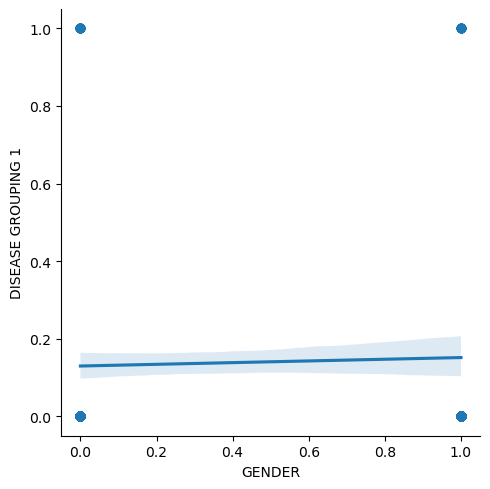

In [23]:
sns.lmplot(x='GENDER',y='DISEASE GROUPING 1',data=df)
plt.show()

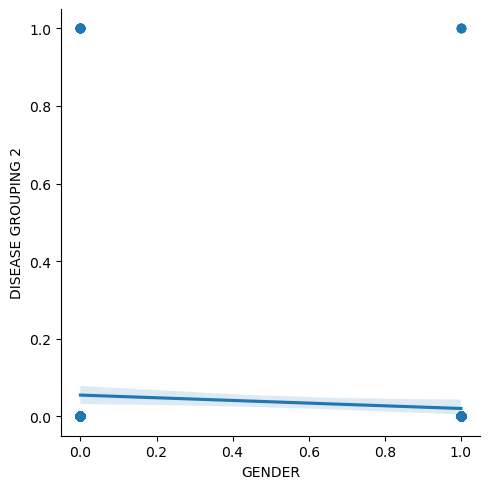

In [24]:
sns.lmplot(x='GENDER',y='DISEASE GROUPING 2',data=df)
plt.show()

In [25]:
df.drop(['GENDER'],axis=1,inplace=True)

In [26]:
df.corr()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
AGE_ABOVE65,1.000000,0.284168,0.057665,0.161254,-0.013983,0.331457,-0.067541,0.359680,0.148703,-0.017298,...,0.206811,0.123078,0.165333,0.221318,0.252774,0.099009,0.201348,0.125200,0.166908,0.268516
DISEASE GROUPING 1,0.284168,1.000000,0.128086,0.191075,-0.031196,0.334781,0.112621,0.347747,0.206752,0.121286,...,0.064536,0.012950,-0.023073,0.094932,0.089885,0.062034,0.061022,0.014381,-0.022941,0.049768
DISEASE GROUPING 2,0.057665,0.128086,1.000000,0.171556,0.196669,0.146883,0.019468,0.135149,0.150731,0.063732,...,0.137694,0.108058,0.127449,0.146818,0.161514,0.083519,0.134076,0.108642,0.127152,0.106990
DISEASE GROUPING 3,0.161254,0.191075,0.171556,1.000000,0.221777,0.210912,0.198248,0.429962,0.027162,0.113672,...,0.174070,0.159434,0.128910,0.202154,0.194468,0.164262,0.174032,0.159851,0.128962,0.151449
DISEASE GROUPING 4,-0.013983,-0.031196,0.196669,0.221777,1.000000,0.097865,0.099397,0.106798,0.113894,0.049300,...,0.044567,0.015393,0.045409,0.004279,0.018639,0.023097,0.048749,0.015283,0.044249,0.074690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEART_RATE_DIFF_REL,0.099009,0.062034,0.083519,0.164262,0.023097,0.144305,0.076617,0.154937,0.050803,0.242637,...,0.741099,0.778191,0.473251,0.796487,0.786716,1.000000,0.741066,0.778563,0.473236,0.370845
RESPIRATORY_RATE_DIFF_REL,0.201348,0.061022,0.134076,0.174032,0.048749,0.148449,0.077403,0.166669,0.097189,0.207256,...,0.989470,0.754958,0.511648,0.765525,0.808283,0.741066,1.000000,0.755474,0.511941,0.603033
TEMPERATURE_DIFF_REL,0.125200,0.014381,0.108642,0.159851,0.015283,0.102101,0.105399,0.132225,0.061899,0.269026,...,0.759770,0.999870,0.466387,0.767148,0.818460,0.778563,0.755474,1.000000,0.466803,0.345022
OXYGEN_SATURATION_DIFF_REL,0.166908,-0.022941,0.127152,0.128962,0.044249,0.054995,0.061224,0.083877,0.116536,0.113292,...,0.517464,0.467424,0.999855,0.512024,0.540362,0.473236,0.511941,0.466803,1.000000,0.270374


In [254]:
class ICU_predictor(nn.Module):
    def __init__(self,input_dim=226,hidden_dim=452,output_dim=2):
        super().__init__()
        self.linear_layer1 = nn.Linear(input_dim,hidden_dim)
        self.linear_layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
        
    def forward(self,x:torch.tensor):
        x = self.linear_layer1(x)
        x = torch.sigmoid(x)
        x = self.linear_layer2(x)
        x = torch.sigmoid(x)
        x = abs(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [255]:
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()

In [256]:
X = df.drop(['ICU'],axis=1).values
y = df['ICU'].values.reshape(-1,1)

In [257]:
y.shape

(545, 1)

In [258]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101,shuffle=True)

In [259]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [260]:
type(X_train)

torch.Tensor

In [261]:
model = ICU_predictor()
model.parameters

<bound method Module.parameters of ICU_predictor(
  (linear_layer1): Linear(in_features=226, out_features=452, bias=True)
  (linear_layer2): Linear(in_features=452, out_features=452, bias=True)
  (out): Linear(in_features=452, out_features=2, bias=True)
)>

In [262]:
model.forward(X_train)

tensor([[0.3786, 0.0849],
        [0.3791, 0.0904],
        [0.3801, 0.0882],
        [0.3781, 0.0818],
        [0.3813, 0.0898],
        [0.3779, 0.0838],
        [0.3796, 0.0895],
        [0.3795, 0.0899],
        [0.3787, 0.0893],
        [0.3784, 0.0888],
        [0.3781, 0.0801],
        [0.3808, 0.0913],
        [0.3790, 0.0895],
        [0.3779, 0.0892],
        [0.3746, 0.0851],
        [0.3797, 0.0843],
        [0.3785, 0.0838],
        [0.3788, 0.0884],
        [0.3805, 0.0843],
        [0.3796, 0.0860],
        [0.3791, 0.0884],
        [0.3783, 0.0933],
        [0.3780, 0.0850],
        [0.3794, 0.0861],
        [0.3819, 0.0852],
        [0.3772, 0.0869],
        [0.3778, 0.0894],
        [0.3784, 0.0859],
        [0.3764, 0.0882],
        [0.3784, 0.0891],
        [0.3774, 0.0850],
        [0.3805, 0.0895],
        [0.3794, 0.0893],
        [0.3789, 0.0919],
        [0.3793, 0.0890],
        [0.3766, 0.0851],
        [0.3766, 0.0903],
        [0.3797, 0.0849],
        [0.3

In [154]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [155]:
losses= []
epochs  = 200
for epoch in range(epochs):
    y_pred = model(X_test)
    loss = criterion(y_train,y_pred)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = criterion(y_test,y_pred)
        if epoch% 10 == 0:
            print(f"Epoch is :{epoch},the training_loss{loss}and the test_loss is{test_loss}")
        

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([109, 2])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (436) must match the size of tensor b (109) at non-singleton dimension 0